In [138]:
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from PROMETHEE import PROMETHEE_2, optimize_PROM2_original, optimize_newconstraint, optimize_PROM2_original_positive_beta
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_samples, silhouette_score


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [238]:
centers_ = [(2, 2, 2, 2, 2), (7, 7, 7, 7, 7), (10, 10, 10, 10, 10), (10,10,10,10,10)]

X, y = make_blobs(n_samples=[1, 7, 6, 1], centers=centers_, n_features=5, cluster_std= [0.25, 1.2, 1.2, 0.25], random_state=42)

In [239]:
m, n = X.shape
X

array([[ 6.71903565,  8.89505538,  7.92092167,  6.43663074,  7.65107205],
       [10.0903489 , 10.38450914,  9.99104349, 10.39116091,  9.34506372],
       [10.38890076,  9.53790126,  9.1876936 , 10.73401155, 11.23719943],
       [11.62748803,  9.91358785, 11.20423948, 10.43396323,  9.22585629],
       [ 5.53498762,  7.25063631,  4.64839585,  5.40617674,  7.23623348],
       [ 7.13310711,  5.61880771,  7.45083762,  6.27923357,  6.6499675 ],
       [10.8861599 , 10.20564194,  9.86122206,  9.63867557,  8.22577361],
       [ 8.75877852,  6.72906844,  7.08103385,  5.29030218,  6.34674073],
       [ 6.32525496,  5.78460266,  7.3770968 ,  5.91037111,  5.30523556],
       [ 2.12417854,  1.96543392,  2.16192213,  2.38075746,  1.94146166],
       [ 6.27795207,  9.22273382,  6.98380333,  5.73074689,  7.98705389],
       [ 6.44389877,  6.4411243 ,  7.29035473,  4.70406371,  4.9300986 ],
       [ 9.42499091,  9.77720923,  8.67239803,  8.56455205, 10.97503099],
       [11.11753614,  8.99293897,  9.6

# PROMETHEE SCORING

In [240]:
m, n = X.shape
X

array([[ 6.71903565,  8.89505538,  7.92092167,  6.43663074,  7.65107205],
       [10.0903489 , 10.38450914,  9.99104349, 10.39116091,  9.34506372],
       [10.38890076,  9.53790126,  9.1876936 , 10.73401155, 11.23719943],
       [11.62748803,  9.91358785, 11.20423948, 10.43396323,  9.22585629],
       [ 5.53498762,  7.25063631,  4.64839585,  5.40617674,  7.23623348],
       [ 7.13310711,  5.61880771,  7.45083762,  6.27923357,  6.6499675 ],
       [10.8861599 , 10.20564194,  9.86122206,  9.63867557,  8.22577361],
       [ 8.75877852,  6.72906844,  7.08103385,  5.29030218,  6.34674073],
       [ 6.32525496,  5.78460266,  7.3770968 ,  5.91037111,  5.30523556],
       [ 2.12417854,  1.96543392,  2.16192213,  2.38075746,  1.94146166],
       [ 6.27795207,  9.22273382,  6.98380333,  5.73074689,  7.98705389],
       [ 6.44389877,  6.4411243 ,  7.29035473,  4.70406371,  4.9300986 ],
       [ 9.42499091,  9.77720923,  8.67239803,  8.56455205, 10.97503099],
       [11.11753614,  8.99293897,  9.6

In [241]:
pgrn = np.random.RandomState(0) # create a random number generator with a fixed seed

n_simulations = 10000 # number of simulations
W = np.zeros(shape = (n, n_simulations)) # weight matrix
P = np.zeros(shape = (n, n_simulations)) # preference threshold matrix
Q = np.zeros(shape = (n, n_simulations)) # indifference threshold matrix

Net_Flows = np.zeros(shape = (m, n_simulations)) # matrix that will receive the PROMETHEE II net flows
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]


s_curve = [0 for j in range (n)] # it will not be used 
pref = [5 for j in range (n)] # We will always use pref. function 5

for s in range (n_simulations):
    W [:,s] = pgrn.dirichlet(np.ones(n),size=1).reshape(n) # weights come from a dirichlet distribution
    Q [:,s] = pgrn.uniform (1,2.5, n) # q_j between 1 and 2.5
    P [:,s] = pgrn.uniform (2.5, 4, n) # p_j between 2.5 and 4
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed
simulation 31 completed
simulation 32 completed
simulation 33 completed
simulation 34 completed
simulation 35 completed
simulation 36 completed
simulation 37 completed
simulation 38 completed
simulation 39 completed
simulation 40 completed
simulation 41 completed
simulation 42 completed
s

In [242]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df


,Sigma,Mu
a_1,0.096491,-0.117092
a_2,0.043059,0.440293
a_3,0.078224,0.464892
a_4,0.057498,0.501540
a_5,0.093034,-0.399370
a_6,0.064118,-0.315435
a_7,0.078754,0.380335
a_8,0.087188,-0.227386
a_9,0.063210,-0.396535
a_10,0.019101,-0.971066


Before plotting the results, lets procceed with a standard normalization.

In [243]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df_transformed

,Sigma,Mu
a_1,0.972306,-0.265372
a_2,-1.356736,0.997856
a_3,0.176063,1.053607
a_4,-0.727374,1.136664
a_5,0.821586,-0.905111
a_6,-0.438805,-0.714885
a_7,0.199154,0.861970
a_8,0.566798,-0.515336
a_9,-0.478376,-0.898685
a_10,-2.401044,-2.200771


Plot the $\sigma-\mu$ figure 

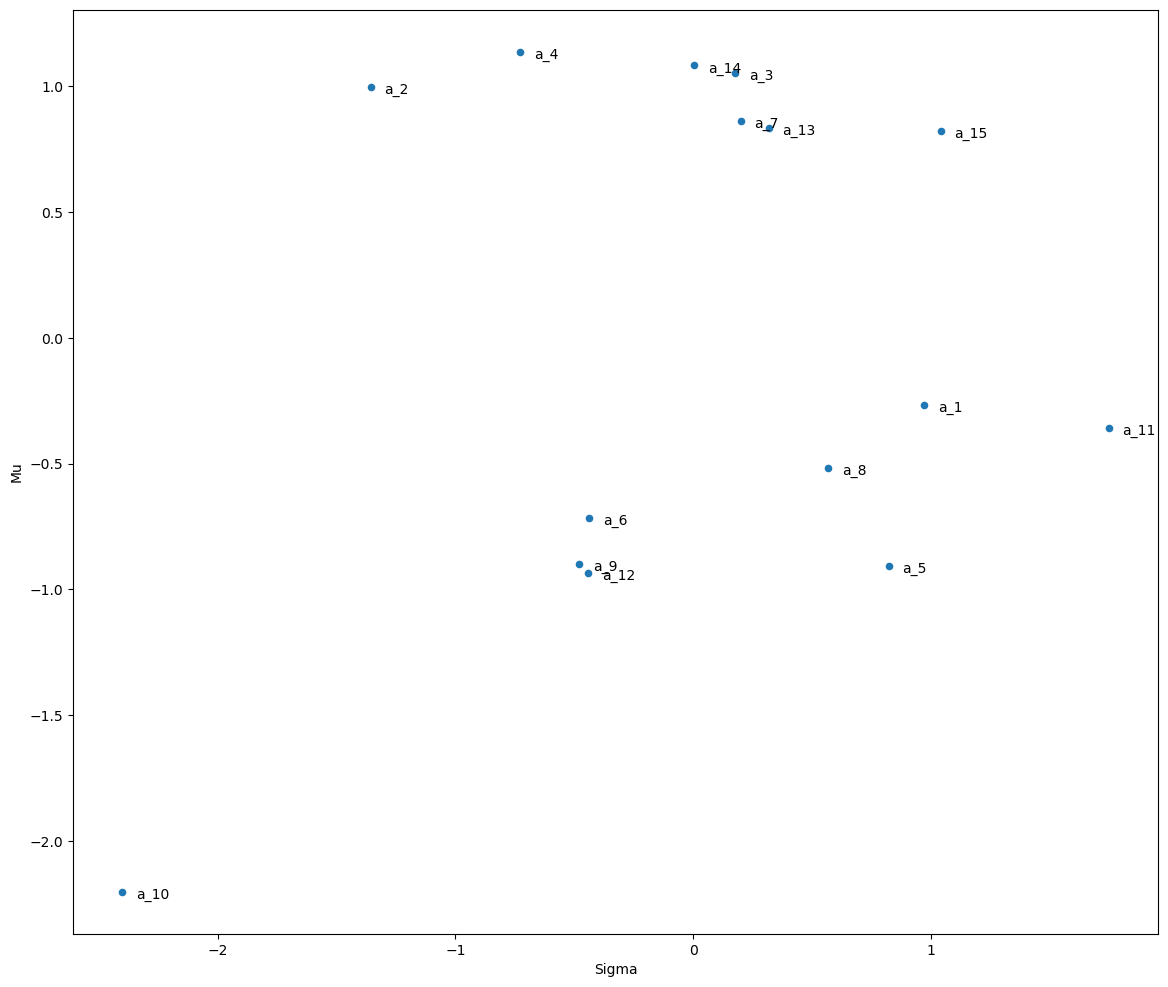

In [244]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

### Get PKFs

Now, get the Pareto-Koopmans frontiers

In [245]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['a_2', 'a_4', 'a_10']
PKF_2: ['a_6', 'a_9', 'a_14']
PKF_3: ['a_3', 'a_12']
PKF_4: ['a_7']
PKF_5: ['a_13']
PKF_6: ['a_1', 'a_8', 'a_15']
PKF_7: ['a_5', 'a_11']


### Run the optimization model

Get the local efficiencies

In [246]:
lambda_ = 0

# Run optimization and get the local efficiences
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        M, resultado = optimize_PROM2_original(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()
        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 1, fronteira 6: resolvido.
alternative 1, fronteira 7: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 2, fronteira 4: resolvido.
alternative 2, fronteira 5: resolvido.
alternative 2, fronteira 6: resolvido.
alternative 2, fronteira 7: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 3, fronteira 5: resolvido.
alternative 3, fronteira 6: resolvido.
alternative 3, fronteira 7: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 4, fronteira 4: resolvido.
alternative 4, fronteira 

### Get local and global efficiencies


In [247]:
# Print local efficiencies
pd.DataFrame(local_ef, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=A.index)

,$PKF_0$,$PKF_1$,$PKF_2$,$PKF_3$,$PKF_4$,$PKF_5$,$PKF_6$
$a_1$,-0.061844,-0.029467,-0.027226,-0.017737,-0.015036,-0.007142,0.040257
$a_2$,0.000000,0.030314,0.034215,0.059958,0.072612,0.077185,0.597642
$a_3$,-0.023764,-0.004098,0.000000,0.084558,0.097211,0.101785,0.622242
$a_4$,0.000000,0.023613,0.036648,0.121206,0.133859,0.138433,0.658890
$a_5$,-0.063156,-0.029525,-0.028310,-0.014280,-0.011578,-0.005845,0.000000
$a_6$,-0.033322,0.000000,0.001480,0.014636,0.017337,0.023070,0.033355
$a_7$,-0.036100,-0.005687,-0.001865,0.000000,0.012653,0.019262,0.537684
$a_8$,-0.054537,-0.021670,-0.019824,-0.008434,-0.005733,0.000000,0.019252
$a_9$,-0.033783,0.000000,0.001084,0.015544,0.018245,0.023978,0.029823
$a_10$,0.000000,0.044109,0.044969,0.059653,0.062354,0.068087,0.073932


Now, lets calculate the global efficience and normalize it using min-max

In [248]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())

results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

,Global Efficiency,Position
a_1,0.107596,13.0
a_2,0.825468,4.0
a_3,0.829824,3.0
a_4,1.000000,1.0
a_5,0.082585,14.0
a_6,0.234298,9.0
a_7,0.574623,5.0
a_8,0.127353,12.0
a_9,0.233091,10.0
a_10,0.449305,8.0


# Model 1 with new constraint

### Testing different values for lambda

In [249]:
lambda_list = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
global_ef_list = []
results_list = []

for lamb in lambda_list:
    # Run optimization and get the local efficiences
    m = Sigma_Mu_df.shape[0] # number of alternatives
    m_f = len(PKF) # number of frontiers
    local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
    local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
    for unit in range (m):
        for fr in range (m_f):
            unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit        
            Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
            for k in range(fr, m_f):
                for l in range(len(PKF[k])):
                    Fr_list.append(PKF[k][l])
            Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
            M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, my_lambda= lamb)
            local_ef_new[unit, fr] = M_new.obj()
            print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

    global_ef_new = np.sum(local_ef_new, axis = 1)
    global_ef_new = (global_ef_new - global_ef_new.min()) /(global_ef_new.max() - global_ef_new.min())
    global_ef_list.append(global_ef_new)
    r_new = pd.DataFrame({"Global Efficiency": global_ef_new}, index = Sigma_Mu_df.index)
    r_new = r_new.assign(Position = r_new.rank(ascending=False))
    results_list.append(r_new)


alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 1, fronteira 6: resolvido.
alternative 1, fronteira 7: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 2, fronteira 4: resolvido.
alternative 2, fronteira 5: resolvido.
alternative 2, fronteira 6: resolvido.
alternative 2, fronteira 7: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 3, fronteira 5: resolvido.
alternative 3, fronteira 6: resolvido.
alternative 3, fronteira 7: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 4, fronteira 4: resolvido.
alternative 4, fronteira 

In [250]:
pd.concat(results_list, axis = 1)

,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position
a_1,0.107596,13.0,0.300900,8.0,0.424486,8.0,0.472196,8.0,0.497494,8.0,0.513169,8.0,0.523834,8.0,0.531560,8.0,0.537415,8.0
a_2,0.825468,4.0,0.897668,4.0,0.924573,4.0,0.934960,4.0,0.940467,4.0,0.943880,4.0,0.946202,4.0,0.947884,4.0,0.949158,4.0
a_3,0.829824,3.0,0.908761,3.0,0.938152,3.0,0.949498,3.0,0.955515,3.0,0.959242,3.0,0.961779,3.0,0.963616,3.0,0.965008,3.0
a_4,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
a_5,0.082585,14.0,0.149014,14.0,0.254970,14.0,0.295874,14.0,0.317564,14.0,0.331003,14.0,0.340147,14.0,0.346770,14.0,0.351790,14.0
a_6,0.234298,9.0,0.256790,9.0,0.340254,11.0,0.372475,11.0,0.389561,11.0,0.400147,11.0,0.407349,11.0,0.412567,11.0,0.416521,11.0
a_7,0.574623,5.0,0.758889,5.0,0.829231,5.0,0.856387,5.0,0.870786,5.0,0.879708,5.0,0.885778,5.0,0.890175,5.0,0.893508,5.0
a_8,0.127353,12.0,0.254505,10.0,0.365465,10.0,0.408302,10.0,0.431016,10.0,0.445089,10.0,0.454665,10.0,0.461602,10.0,0.466858,10.0
a_9,0.233091,10.0,0.214960,12.0,0.292558,12.0,0.322515,12.0,0.338400,12.0,0.348242,12.0,0.354938,12.0,0.359789,12.0,0.363466,12.0
a_10,0.449305,8.0,0.000000,15.0,0.000000,15.0,0.000000,15.0,0.000000,15.0,0.000000,15.0,0.000000,15.0,0.000000,15.0,0.000000,15.0


# Modified Model 1

In [251]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df


,Sigma,Mu
a_1,0.096491,-0.117092
a_2,0.043059,0.440293
a_3,0.078224,0.464892
a_4,0.057498,0.501540
a_5,0.093034,-0.399370
a_6,0.064118,-0.315435
a_7,0.078754,0.380335
a_8,0.087188,-0.227386
a_9,0.063210,-0.396535
a_10,0.019101,-0.971066


In [252]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df_transformed

,Sigma,Mu
a_1,0.972306,-0.265372
a_2,-1.356736,0.997856
a_3,0.176063,1.053607
a_4,-0.727374,1.136664
a_5,0.821586,-0.905111
a_6,-0.438805,-0.714885
a_7,0.199154,0.861970
a_8,0.566798,-0.515336
a_9,-0.478376,-0.898685
a_10,-2.401044,-2.200771


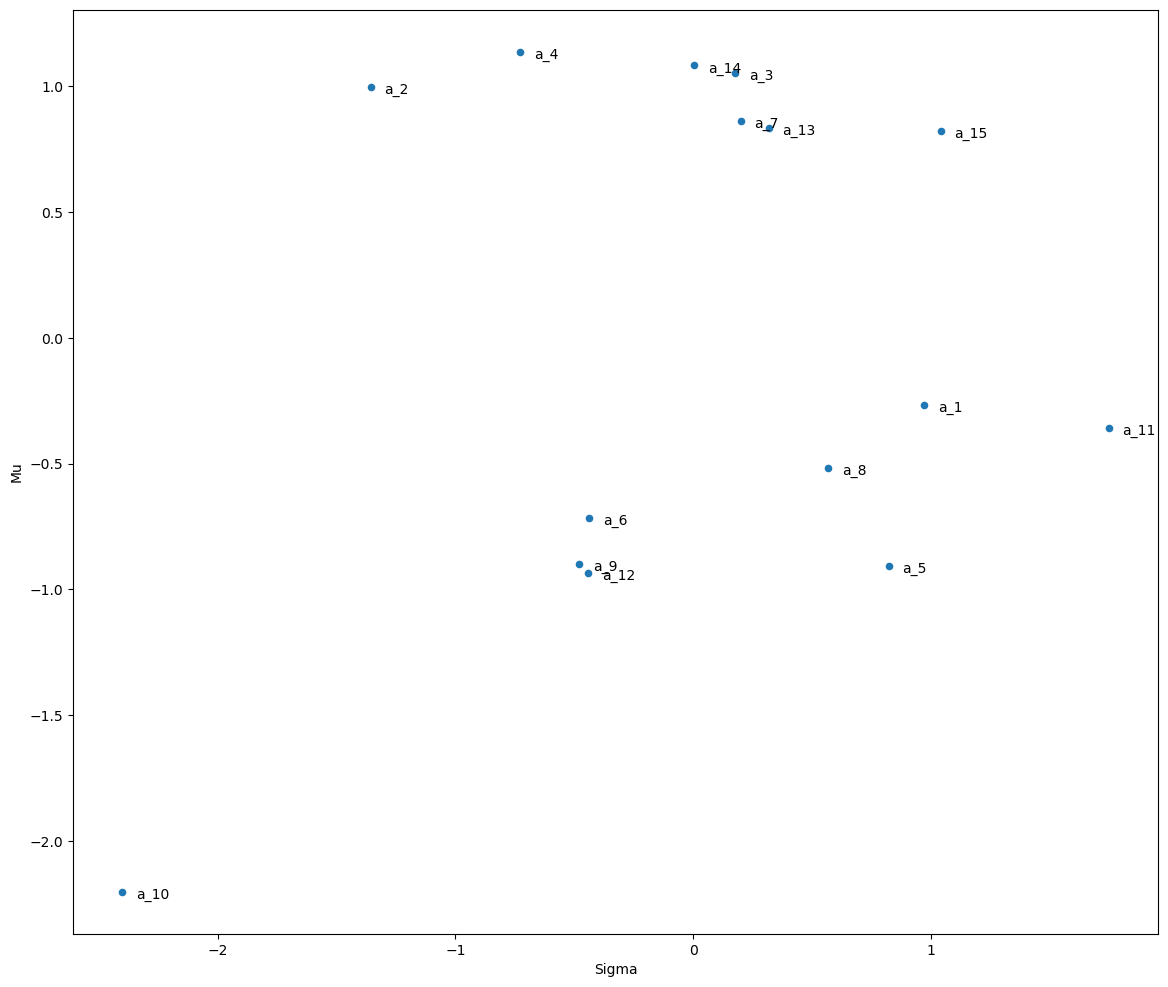

In [253]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

Now, the rule for getting PKFs is changed

In [254]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] < comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] < comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['a_3', 'a_4', 'a_7', 'a_11', 'a_13', 'a_14', 'a_15']
PKF_2: ['a_1', 'a_2']
PKF_3: ['a_5', 'a_8']
PKF_4: ['a_6']
PKF_5: ['a_9', 'a_12']
PKF_6: ['a_10']


In [255]:
lambda_ = 0
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit
        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        
        
        M, resultado = optimize_PROM2_original_positive_beta(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 1, fronteira 6: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 2, fronteira 4: resolvido.
alternative 2, fronteira 5: resolvido.
alternative 2, fronteira 6: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 3, fronteira 5: resolvido.
alternative 3, fronteira 6: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 4, fronteira 4: resolvido.
alternative 4, fronteira 5: resolvido.
alternative 4, fronteira 6: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 

In [256]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())
results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

,Global Efficiency,Position
a_1,0.408525,8.0
a_2,0.921441,4.0
a_3,0.959762,3.0
a_4,1.000000,1.0
a_5,0.218194,12.0
a_6,0.223784,11.0
a_7,0.876670,5.0
a_8,0.301547,10.0
a_9,0.184736,13.0
a_10,0.000000,15.0


Alternativa $a_3$ agora está na oitava posição ao invés da posição 15.

Já a alternativa $a_{10}$ subiu para terceiro lugar!

Vamos ver o comportamento dessa alternativa.

In [257]:
Net_Flows.shape

(15, 10000)

In [258]:
Net_Flows_df = pd.DataFrame(Net_Flows, columns = [s for s in range(n_simulations)], index = A.index)
Net_Flows_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
$a_1$,-0.045763,-0.129267,-0.010323,-0.246375,-0.085591,-0.075908,-0.089593,-0.096911,-0.136030,-0.087948,...,0.007150,-0.124394,-0.269728,-0.128946,-0.186616,-0.022927,-0.051751,-0.009164,-0.041095,-0.258724
$a_2$,0.418850,0.401711,0.452208,0.468675,0.390142,0.476766,0.481699,0.349396,0.496687,0.424003,...,0.418851,0.437506,0.528167,0.497254,0.464769,0.409485,0.395809,0.387447,0.404286,0.485686
$a_3$,0.424951,0.507990,0.388397,0.533234,0.335707,0.466464,0.505023,0.502530,0.387187,0.428158,...,0.538398,0.496644,0.495872,0.335359,0.459794,0.378512,0.405411,0.489799,0.440538,0.510177
$a_4$,0.489199,0.471756,0.499268,0.543367,0.553479,0.496584,0.501319,0.390471,0.581203,0.500353,...,0.416602,0.499353,0.566349,0.652622,0.534246,0.441037,0.463357,0.404628,0.431621,0.550684
$a_5$,-0.382690,-0.401004,-0.366011,-0.396658,-0.545716,-0.375189,-0.354073,-0.266041,-0.589873,-0.445270,...,-0.240191,-0.414923,-0.475856,-0.703795,-0.470409,-0.300816,-0.357181,-0.304386,-0.281463,-0.435027
$a_6$,-0.320508,-0.230307,-0.399993,-0.330847,-0.205745,-0.395108,-0.399353,-0.251503,-0.273968,-0.287134,...,-0.398049,-0.280021,-0.314395,-0.238496,-0.248120,-0.333737,-0.293694,-0.333142,-0.347863,-0.322575
$a_7$,0.360724,0.286666,0.441357,0.410779,0.346219,0.436617,0.430878,0.227844,0.465657,0.393184,...,0.300737,0.334475,0.512834,0.454996,0.384110,0.333836,0.318505,0.294888,0.336480,0.470409
$a_8$,-0.242079,-0.299665,-0.299357,-0.108965,-0.204354,-0.351822,-0.348426,-0.161757,-0.235549,-0.248829,...,-0.261908,-0.295613,-0.366865,-0.248474,-0.290839,-0.229490,-0.183584,-0.233843,-0.260240,-0.250373
$a_9$,-0.392626,-0.351770,-0.433789,-0.461635,-0.263018,-0.433942,-0.464566,-0.368864,-0.331370,-0.349480,...,-0.534319,-0.365358,-0.349755,-0.284442,-0.321832,-0.377983,-0.367810,-0.437535,-0.403729,-0.388231
$a_10$,-0.947049,-0.954784,-0.972712,-0.988130,-0.961176,-0.956828,-0.922398,-0.966532,-0.985337,-0.941860,...,-0.997892,-0.966024,-0.919256,-0.990953,-0.889872,-0.964569,-0.977644,-0.973551,-0.976626,-0.970593


In [259]:
Net_Flows_rank = Net_Flows_df.rank(ascending=False)
Net_Flows_rank

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
$a_1$,8.0,8.0,8.0,9.0,8.0,8.0,8.0,9.0,8.0,8.0,...,9.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0,8.0,9.0
$a_2$,3.0,5.0,2.0,4.0,4.0,2.0,4.0,5.0,2.0,4.0,...,4.0,4.0,3.0,3.0,3.0,2.0,4.0,5.0,5.0,4.0
$a_3$,2.0,2.0,5.0,3.0,6.0,3.0,1.0,1.0,6.0,3.0,...,1.0,3.0,6.0,6.0,5.0,3.0,3.0,1.0,1.0,3.0
$a_4$,1.0,3.0,1.0,2.0,1.0,1.0,2.0,4.0,1.0,1.0,...,5.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0
$a_5$,12.0,13.0,11.0,12.0,14.0,11.0,11.0,12.0,14.0,14.0,...,10.0,13.0,14.0,14.0,14.0,11.0,13.0,11.0,11.0,14.0
$a_6$,11.0,10.0,12.0,11.0,11.0,12.0,12.0,11.0,11.0,11.0,...,12.0,10.0,9.0,9.0,9.0,13.0,11.0,12.0,12.0,11.0
$a_7$,6.0,7.0,4.0,6.0,5.0,5.0,5.0,6.0,5.0,6.0,...,6.0,7.0,5.0,5.0,6.0,6.0,7.0,6.0,6.0,5.0
$a_8$,10.0,11.0,10.0,8.0,10.0,10.0,10.0,10.0,9.0,10.0,...,11.0,11.0,12.0,10.0,11.0,10.0,10.0,10.0,10.0,8.0
$a_9$,13.0,12.0,14.0,13.0,12.0,13.0,13.0,13.0,12.0,12.0,...,14.0,12.0,11.0,12.0,12.0,14.0,14.0,13.0,14.0,12.0
$a_10$,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0


In [260]:
# Porcentagem de vezes que a_3 vence a_11

count = 0
for j in range (n_simulations):
    if Net_Flows_rank.loc['$a_3$'][j] < Net_Flows_rank.loc['$a_5$'][j]:
        count += 1

count/n_simulations

1.0

In [261]:
# Mode over alternative positions
Net_Flows_rank.mode(axis = 1)

,0
$a_1$,8.0
$a_2$,4.0
$a_3$,2.0
$a_4$,1.0
$a_5$,14.0
$a_6$,11.0
$a_7$,6.0
$a_8$,10.0
$a_9$,13.0
$a_10$,15.0


In [262]:
Net_Flows_rank_counts = Net_Flows_rank.apply(pd.Series.value_counts, axis = 1).fillna(0)
Net_Flows_rank_counts

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
$a_1$,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6325.0,3523.0,152.0,0.0,0.0,0.0,0.0,0.0
$a_2$,117.0,1631.0,2348.0,3612.0,2284.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$a_3$,1876.0,2186.0,2012.0,1087.0,1260.0,1579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$a_4$,5982.0,688.0,1777.0,1218.0,335.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$a_5$,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1032.0,1699.0,2389.0,747.0,4133.0,0.0
$a_6$,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,412.0,2172.0,4752.0,2192.0,452.0,20.0,0.0
$a_7$,0.0,253.0,855.0,1496.0,2250.0,4165.0,981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$a_8$,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2170.0,962.0,4468.0,1989.0,377.0,34.0,0.0,0.0
$a_9$,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,287.0,3565.0,4193.0,1896.0,0.0
$a_10$,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0


In [263]:
Net_Flows_rank_probs = Net_Flows_rank_counts/n_simulations
Net_Flows_rank_probs

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
$a_1$,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6325,0.3523,0.0152,0.0000,0.0000,0.0000,0.0000,0.0
$a_2$,0.0117,0.1631,0.2348,0.3612,0.2284,0.0008,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
$a_3$,0.1876,0.2186,0.2012,0.1087,0.1260,0.1579,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
$a_4$,0.5982,0.0688,0.1777,0.1218,0.0335,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
$a_5$,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1032,0.1699,0.2389,0.0747,0.4133,0.0
$a_6$,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0412,0.2172,0.4752,0.2192,0.0452,0.0020,0.0
$a_7$,0.0000,0.0253,0.0855,0.1496,0.2250,0.4165,0.0981,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
$a_8$,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2170,0.0962,0.4468,0.1989,0.0377,0.0034,0.0000,0.0
$a_9$,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0059,0.0287,0.3565,0.4193,0.1896,0.0
$a_10$,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0


In [264]:
pd.DataFrame(Net_Flows_rank_probs.max(axis=1))

,0
$a_1$,0.6325
$a_2$,0.3612
$a_3$,0.2186
$a_4$,0.5982
$a_5$,0.4133
$a_6$,0.4752
$a_7$,0.4165
$a_8$,0.4468
$a_9$,0.4193
$a_10$,1.0000


In [265]:
SumProduct_rank_probs = Net_Flows_rank_probs * [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
Net_Flows_expected_rank = SumProduct_rank_probs.sum(axis = 1)
pd.DataFrame(Net_Flows_expected_rank)

,0
$a_1$,8.3827
$a_2$,3.6339
$a_3$,3.2406
$a_4$,1.9236
$a_5$,12.5250
$a_6$,11.0160
$a_7$,5.2162
$a_8$,9.7543
$a_9$,12.7580
$a_10$,15.0000


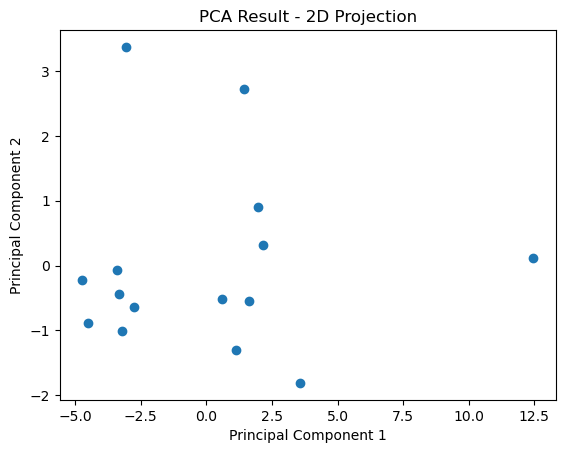

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Plot the results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Result - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#print the decision matrix
A = pd.DataFrame(X, columns = ['$g_' + str(i+1) + '$' for i in range (X.shape[1])], index= ['$a_' + str(i+1) + '$' for i in range (X.shape[0])])
A

,$g_1$,$g_2$,$g_3$,$g_4$,$g_5$
$a_1$,5.827267,8.140106,6.818371,6.876137,7.492718
$a_2$,7.187619,8.476349,8.442856,6.535208,6.637237
$a_3$,3.936412,7.784342,8.037323,6.109402,9.723706
$a_4$,10.513998,10.079821,10.362966,9.238813,9.564711
$a_5$,7.172852,8.745128,7.913245,7.146010,7.532636
$a_6$,10.182273,10.032246,10.284850,9.691294,10.100585
$a_7$,9.517863,8.043762,10.555339,8.911242,10.062334
$a_8$,5.254761,7.054910,6.775379,8.839335,8.763231
$a_9$,9.474311,8.496646,10.932988,8.063323,9.744712
$a_10$,8.741736,8.295978,7.952476,12.340930,9.388417


In [ ]:
#Normalização
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit(A).transform(A) 
X_norm = pd.DataFrame(X_norm, columns=A.columns, index = A.index )
X_norm

,$g_1$,$g_2$,$g_3$,$g_4$,$g_5$
$a_1$,0.419455,0.722129,0.526419,0.441268,0.648827
$a_2$,0.587962,0.762329,0.713393,0.406411,0.538386
$a_3$,0.185235,0.679596,0.666717,0.362875,0.936844
$a_4$,1.000000,0.954035,0.934392,0.682833,0.916318
$a_5$,0.586133,0.794464,0.652436,0.468860,0.653980
$a_6$,0.958909,0.948347,0.925401,0.729096,0.985499
$a_7$,0.876609,0.710611,0.956534,0.649341,0.980561
$a_8$,0.348539,0.592387,0.521471,0.641990,0.812848
$a_9$,0.871214,0.764756,1.000000,0.562648,0.939556
$a_10$,0.780470,0.740765,0.656951,1.000000,0.893559


In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 8)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X_norm)
    kmeanModel.fit(X_norm)
    distortions.append(sum(np.min(cdist(X_norm, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_norm.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X_norm, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_norm.shape[0]
    mapping2[k] = kmeanModel.inertia_


2 : 0.31742561197590885
3 : 0.21766662749717444
4 : 0.18445405837403422
5 : 0.1514248412368359
6 : 0.13012865676293722
7 : 0.10357834250405039


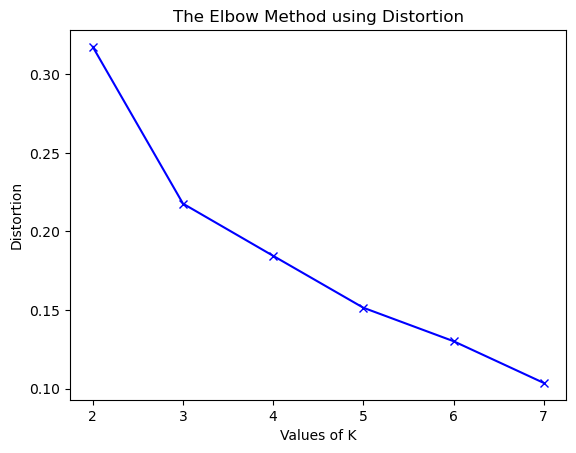

In [ ]:
# Plot distortion

for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

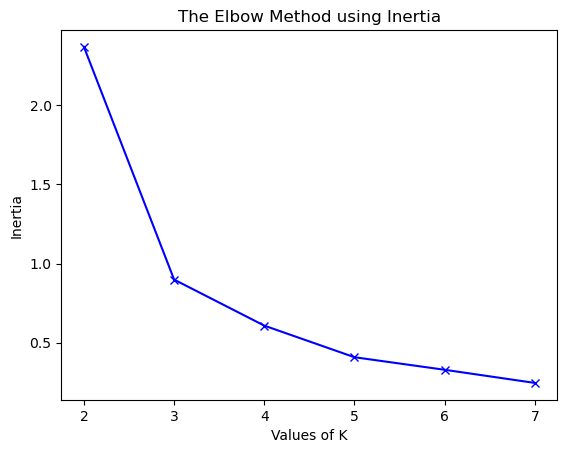

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
from matplotlib import cm


For n_clusters = 2 The average silhouette_score is : 0.44154750308930735
For n_clusters = 3 The average silhouette_score is : 0.4733162741213096
For n_clusters = 4 The average silhouette_score is : 0.4295641121278674
For n_clusters = 5 The average silhouette_score is : 0.3813992087490294
For n_clusters = 6 The average silhouette_score is : 0.32006399220853243
For n_clusters = 7 The average silhouette_score is : 0.2640772352282089


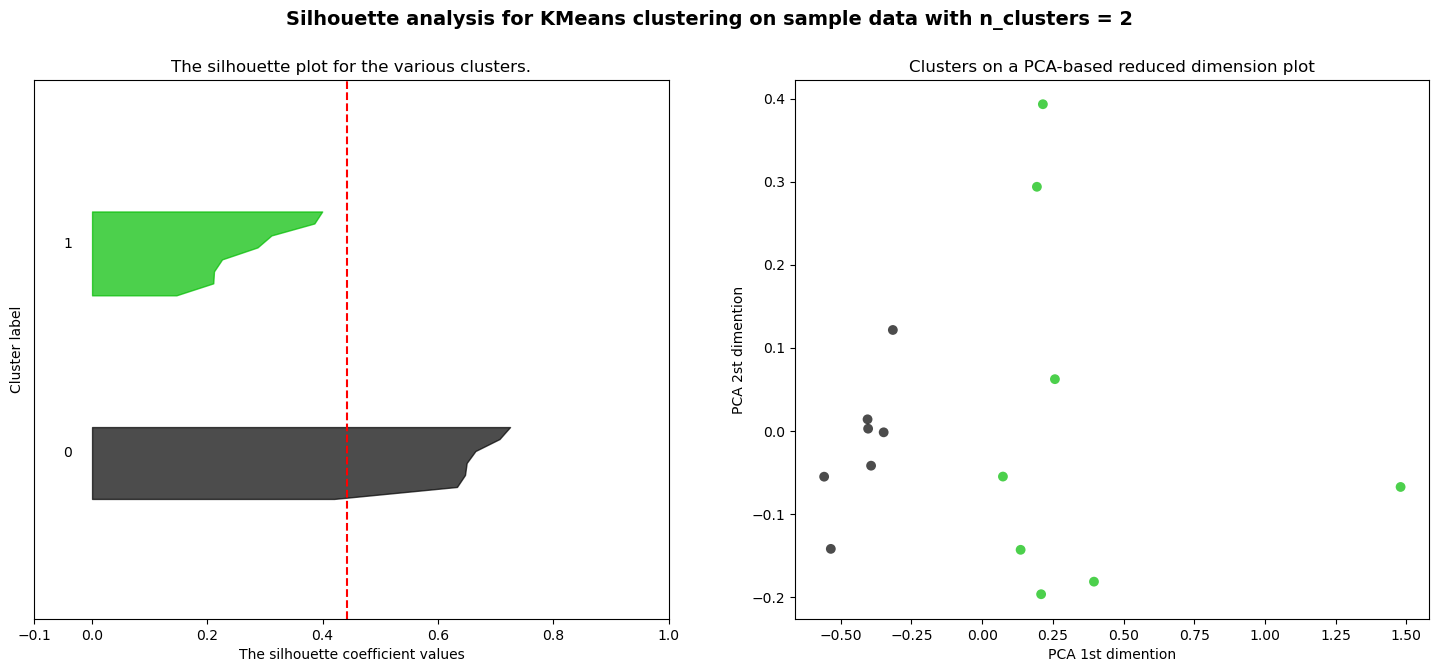

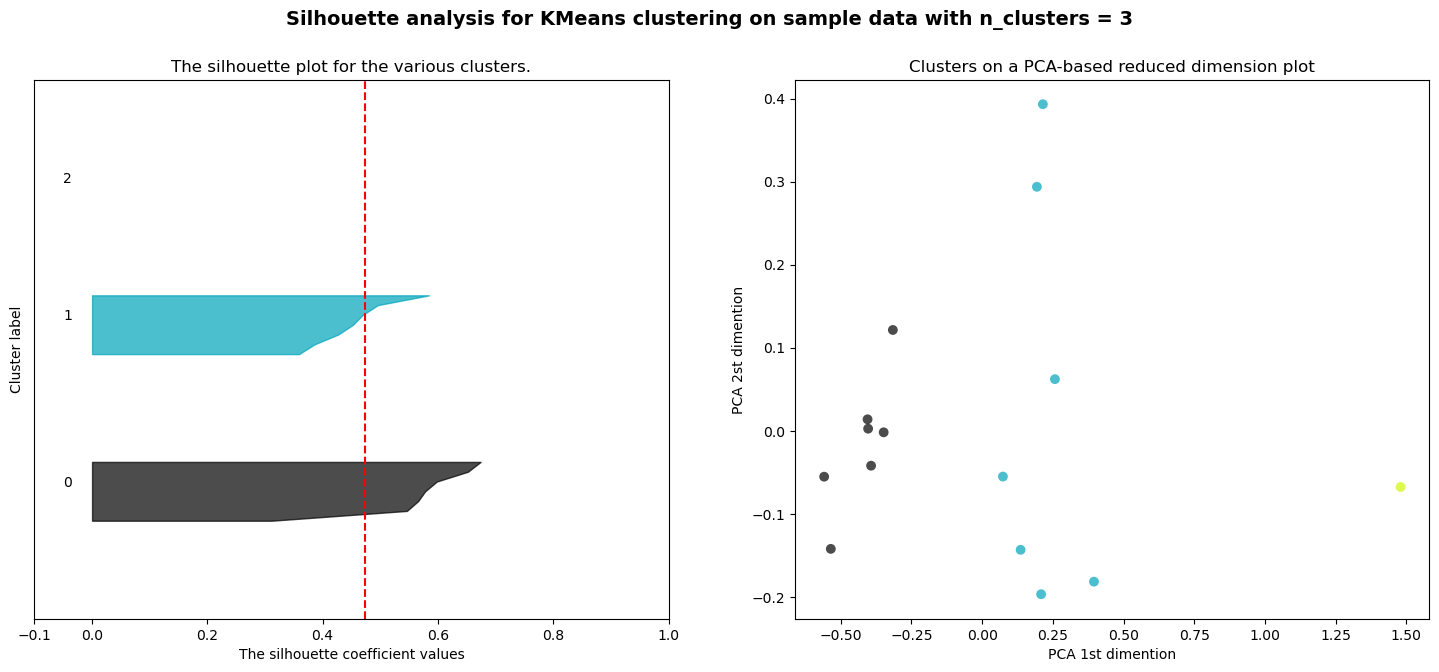

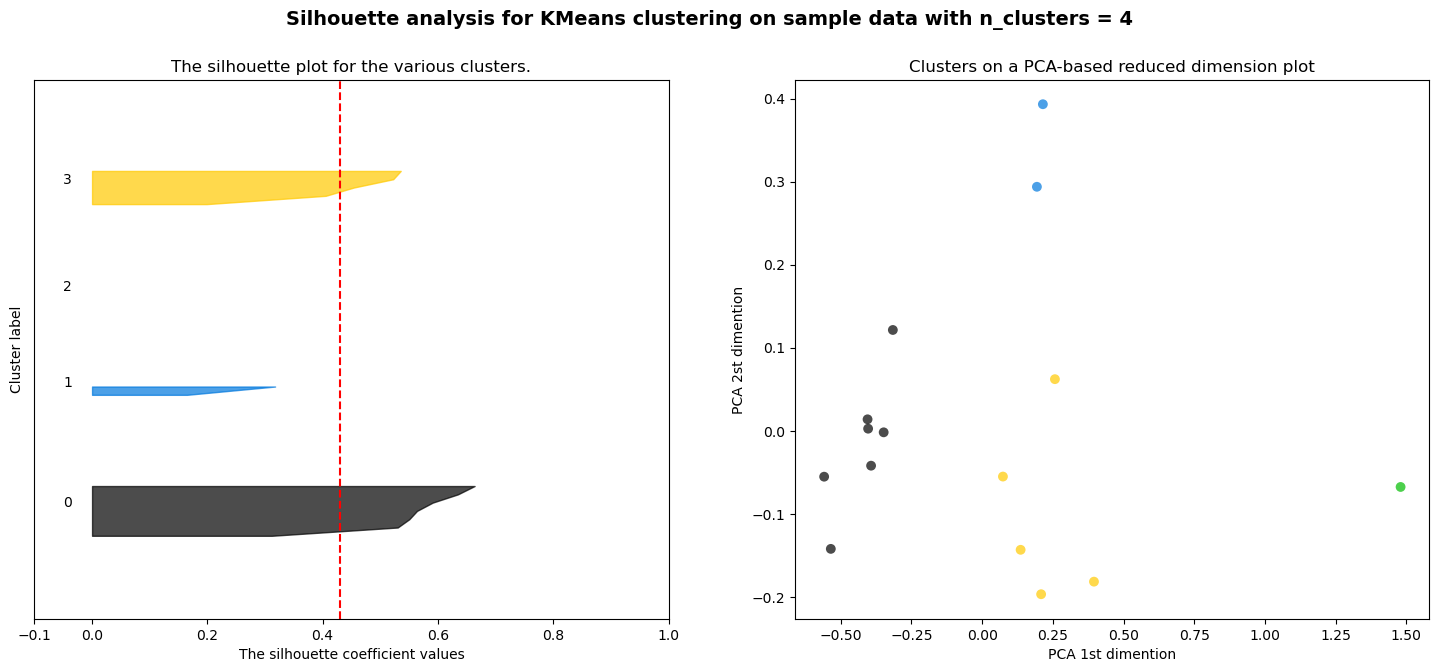

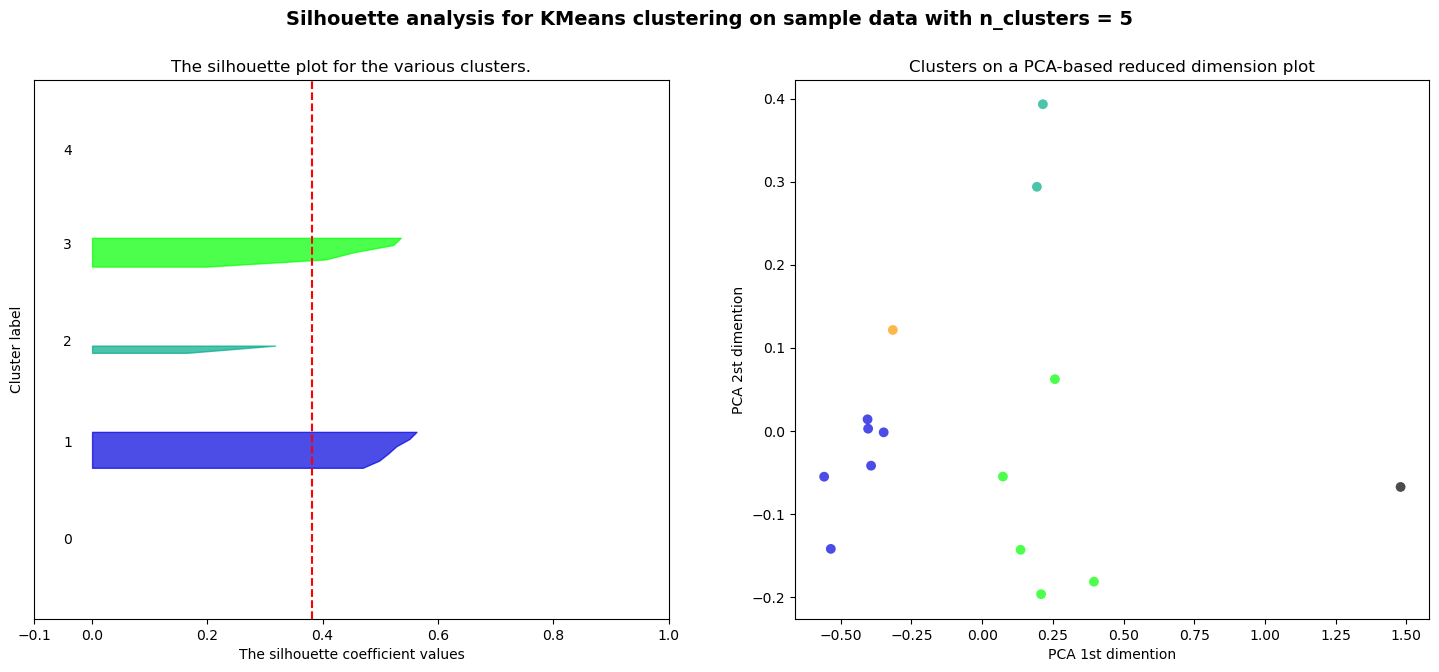

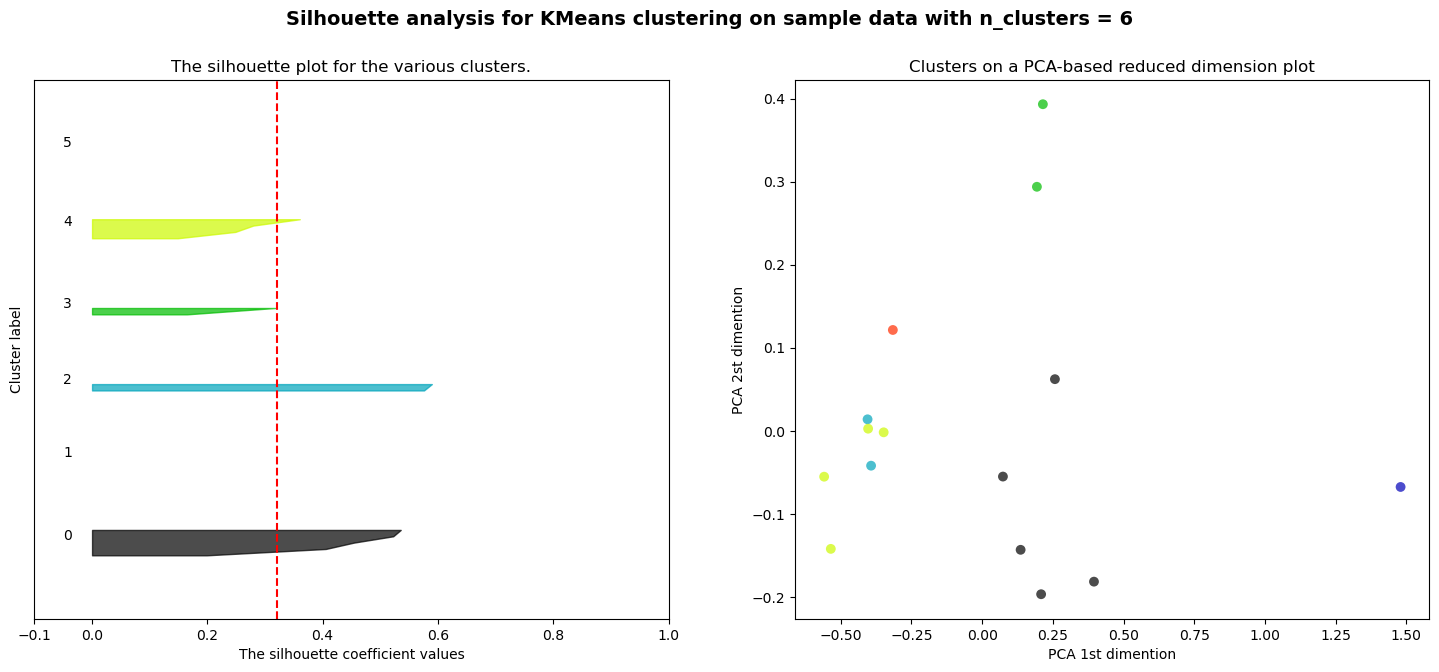

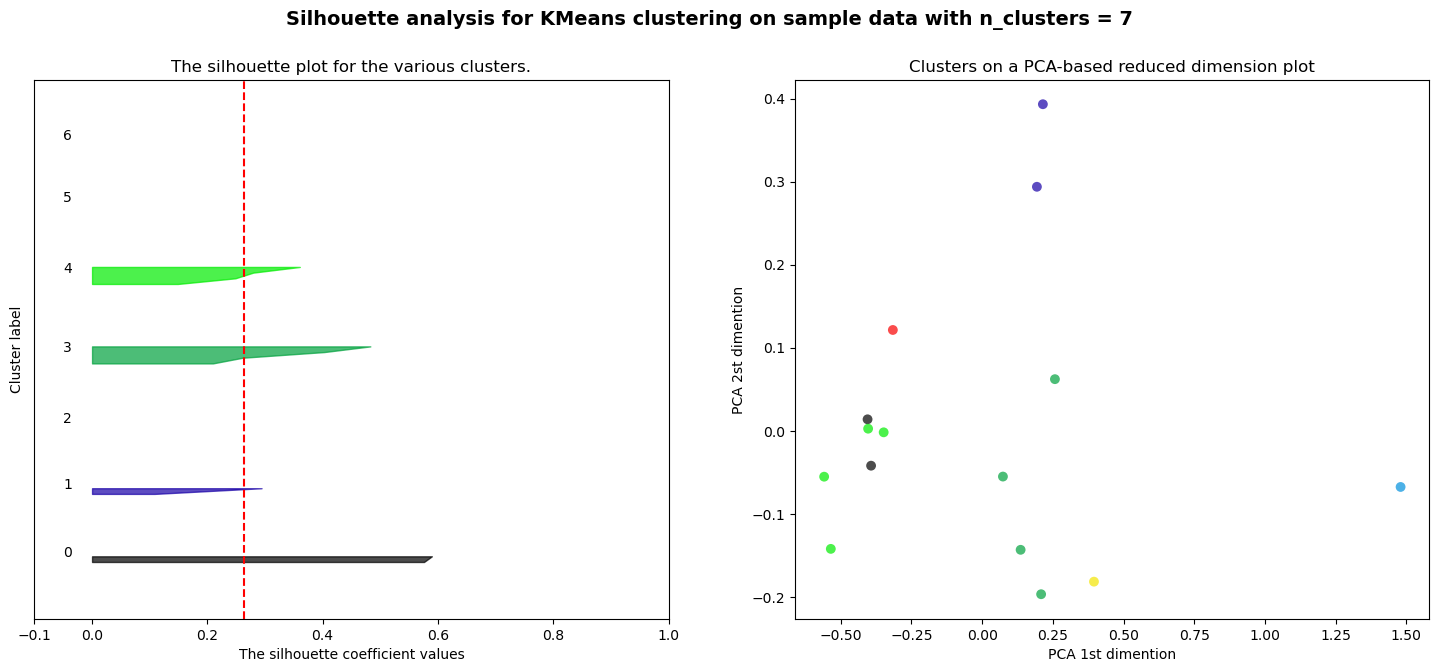

In [ ]:
range_n_clusters = range(2,8)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_norm)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_norm, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_norm, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    pca = PCA(2)
    data = pca.fit_transform(X_norm)
    ax2.scatter(
        data[:, 0], data[:, 1], marker=".", s=200, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    # Labeling the clusters
    centers = kmeans.cluster_centers_
    '''
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=100,
        edgecolor="k",
    )
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    '''
    ax2.set_title("Clusters on a PCA-based reduced dimension plot")
    ax2.set_xlabel("PCA 1st dimention")
    ax2.set_ylabel("PCA 2st dimention")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Cluster Centers 

In [203]:
Centers = kmeans.cluster_centers_
Centers

array([[0.47562802, 0.71302238, 0.57487549, 0.43209342, 0.65358694],
       [0.87525735, 0.85877454, 0.86794988, 0.68408348, 0.95480579],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

## Get the clusters

In [204]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_norm)
clusters = pd.DataFrame(X).assign(Category = kmeans.labels_)
clusters

,0,1,2,3,4,Category
0,5.827267,8.140106,6.818371,6.876137,7.492718,0
1,7.187619,8.476349,8.442856,6.535208,6.637237,0
2,3.936412,7.784342,8.037323,6.109402,9.723706,0
3,10.513998,10.079821,10.362966,9.238813,9.564711,1
4,7.172852,8.745128,7.913245,7.146010,7.532636,0
5,10.182273,10.032246,10.284850,9.691294,10.100585,1
6,9.517863,8.043762,10.555339,8.911242,10.062334,1
7,5.254761,7.054910,6.775379,8.839335,8.763231,0
8,9.474311,8.496646,10.932988,8.063323,9.744712,1
9,8.741736,8.295978,7.952476,12.340930,9.388417,1


We see above that alternative a_15 is isolated in cluster 2.

In [221]:
X_C0e1 = clusters.drop(14).drop(columns = 'Category')

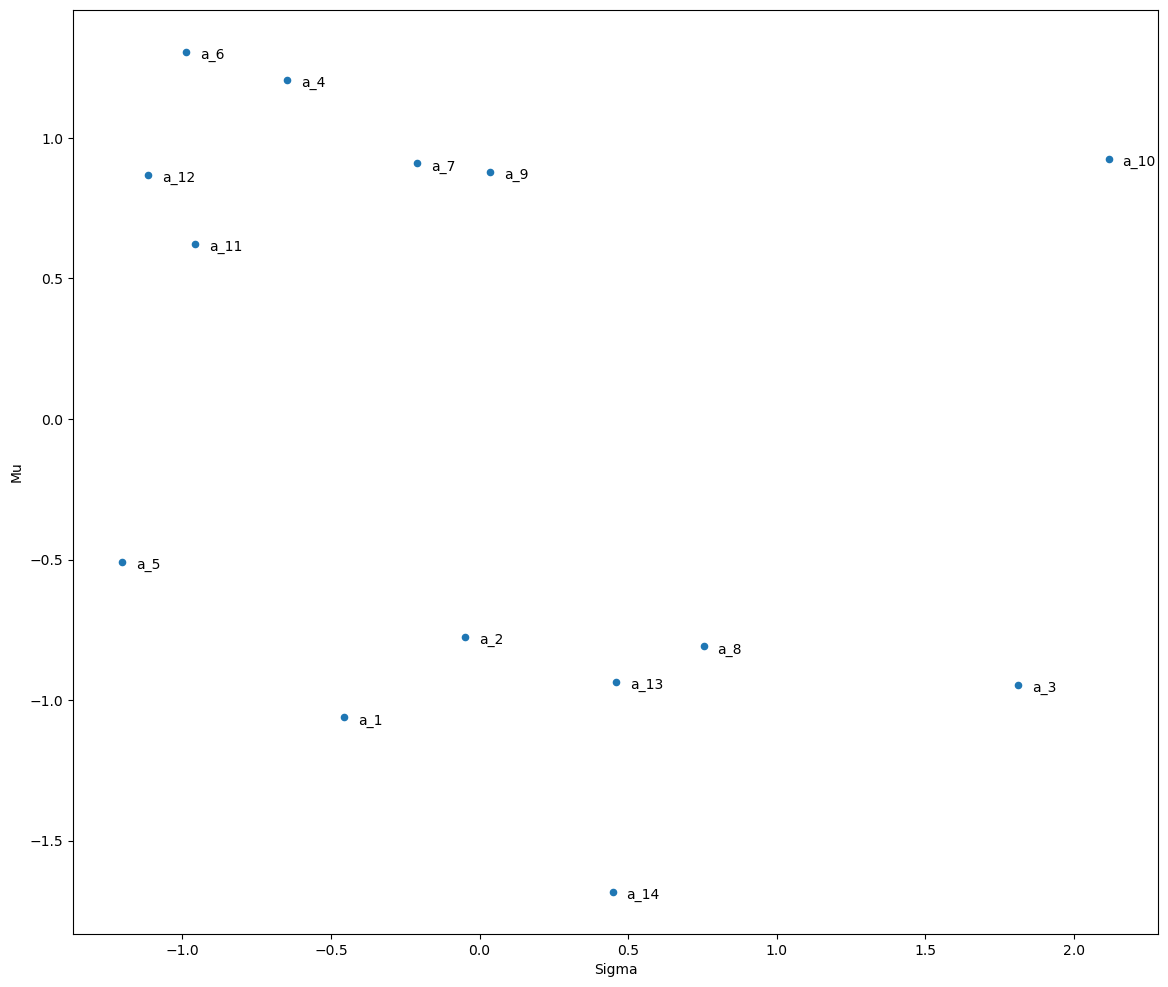

In [222]:
m,n = X_C0e1.shape

pgrn = np.random.RandomState(0) # create a random number generator with a fixed seed

n_simulations = 10000 # number of simulations
W = np.zeros(shape = (n, n_simulations)) # weight matrix
P = np.zeros(shape = (n, n_simulations)) # preference threshold matrix
Q = np.zeros(shape = (n, n_simulations)) # indifference threshold matrix

Net_Flows = np.zeros(shape = (m, n_simulations)) # matrix that will receive the PROMETHEE II net flows
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]
s_curve = [0 for j in range (n)] # it will not be used 
pref = [5 for j in range (n)] # We will always use pref. function 5
for s in range (n_simulations):
    W [:,s] = pgrn.dirichlet(np.ones(n),size=1).reshape(n) # weights come from a dirichlet distribution
    Q [:,s] = pgrn.uniform (1,2.5, n) # q_j between 1 and 2.5
    P [:,s] = pgrn.uniform (2.5, 4, n) # p_j between 2.5 and 4
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X_C0e1, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    #print (f'simulation {s+1} completed')

mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)
#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = ['a_' + str(i+1) for i in range (m)])

fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))

for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

In [223]:
X_C0 = clusters.drop([3,5,6,8,9,10,11,14]).drop(columns='Category')
X_C0

,0,1,2,3,4
0,5.827267,8.140106,6.818371,6.876137,7.492718
1,7.187619,8.476349,8.442856,6.535208,6.637237
2,3.936412,7.784342,8.037323,6.109402,9.723706
4,7.172852,8.745128,7.913245,7.146010,7.532636
7,5.254761,7.054910,6.775379,8.839335,8.763231
12,7.400409,8.792895,6.753810,7.375681,5.975085
13,7.185937,7.453795,5.934657,4.623044,6.582505


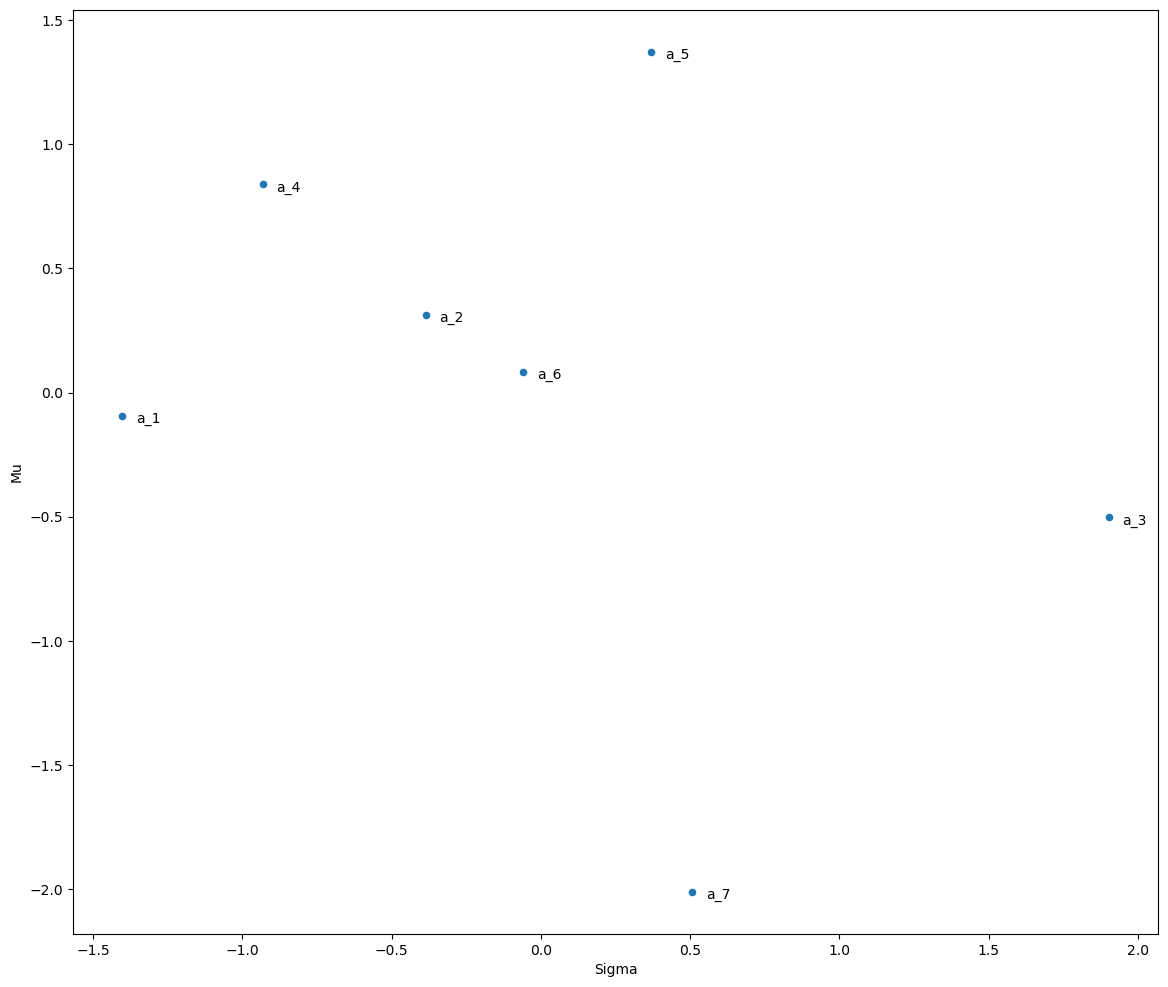

In [224]:
m,n = X_C0.shape

pgrn = np.random.RandomState(0) # create a random number generator with a fixed seed

n_simulations = 10000 # number of simulations
W = np.zeros(shape = (n, n_simulations)) # weight matrix
P = np.zeros(shape = (n, n_simulations)) # preference threshold matrix
Q = np.zeros(shape = (n, n_simulations)) # indifference threshold matrix

Net_Flows = np.zeros(shape = (m, n_simulations)) # matrix that will receive the PROMETHEE II net flows
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]
s_curve = [0 for j in range (n)] # it will not be used 
pref = [5 for j in range (n)] # We will always use pref. function 5
for s in range (n_simulations):
    W [:,s] = pgrn.dirichlet(np.ones(n),size=1).reshape(n) # weights come from a dirichlet distribution
    Q [:,s] = pgrn.uniform (1,2.5, n) # q_j between 1 and 2.5
    P [:,s] = pgrn.uniform (2.5, 4, n) # p_j between 2.5 and 4
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X_C0, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    #print (f'simulation {s+1} completed')

mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)
#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = ['a_' + str(i+1) for i in range (m)])

fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))

for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

In [225]:
X_C1 = clusters.drop([0,1,2,4,7,12,13,14]).drop(columns='Category')
X_C1

,0,1,2,3,4
3,10.513998,10.079821,10.362966,9.238813,9.564711
5,10.182273,10.032246,10.284850,9.691294,10.100585
6,9.517863,8.043762,10.555339,8.911242,10.062334
8,9.474311,8.496646,10.932988,8.063323,9.744712
9,8.741736,8.295978,7.952476,12.340930,9.388417
10,9.193047,9.568536,9.024224,7.928461,10.212911
11,8.925440,10.464283,9.387034,8.583241,9.966181


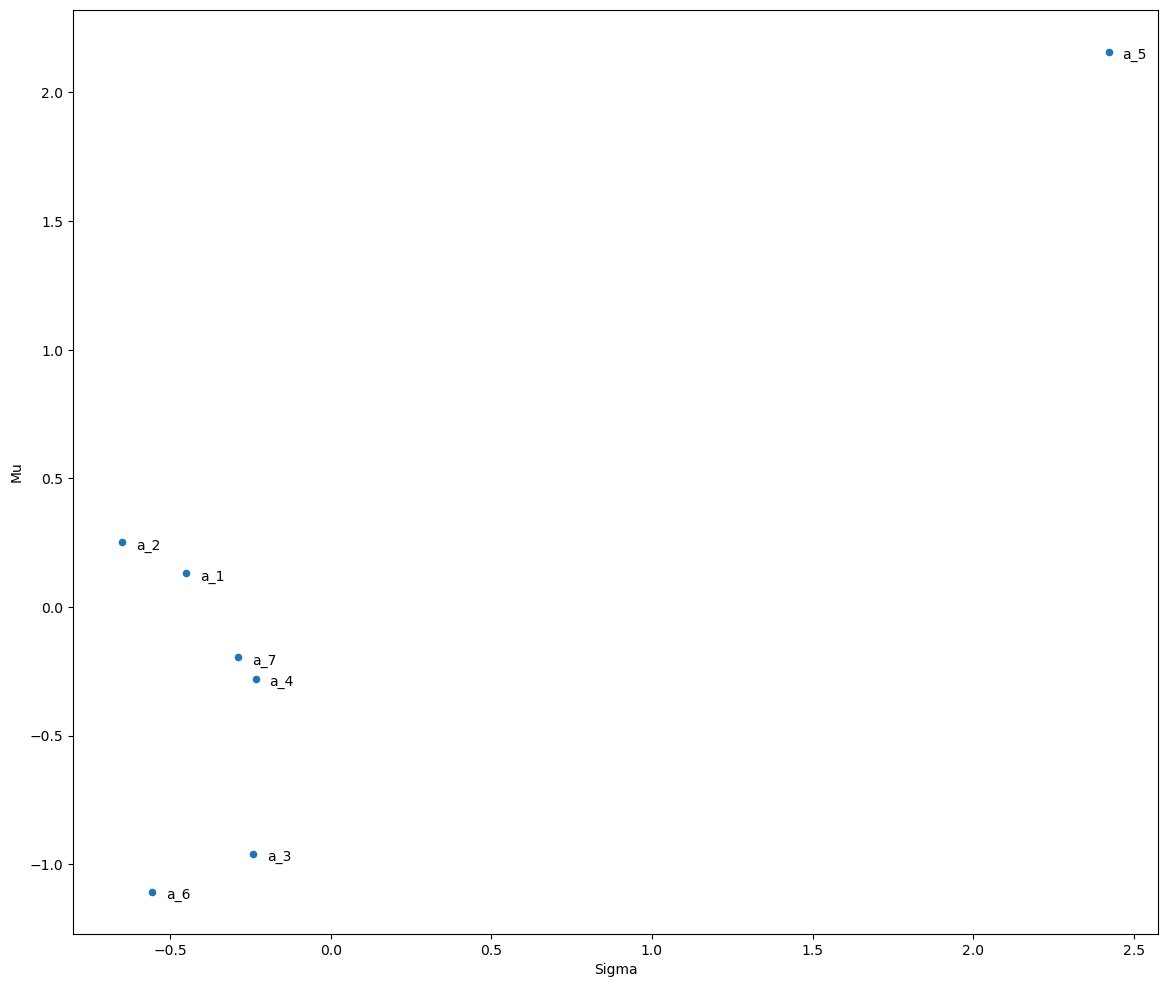

In [227]:
X_C1 = np.array(X_C1)

m,n = X_C1.shape

pgrn = np.random.RandomState(0) # create a random number generator with a fixed seed

n_simulations = 10000 # number of simulations
W = np.zeros(shape = (n, n_simulations)) # weight matrix
P = np.zeros(shape = (n, n_simulations)) # preference threshold matrix
Q = np.zeros(shape = (n, n_simulations)) # indifference threshold matrix

Net_Flows = np.zeros(shape = (m, n_simulations)) # matrix that will receive the PROMETHEE II net flows
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]
s_curve = [0 for j in range (n)] # it will not be used 
pref = [5 for j in range (n)] # We will always use pref. function 5
for s in range (n_simulations):
    W [:,s] = pgrn.dirichlet(np.ones(n),size=1).reshape(n) # weights come from a dirichlet distribution
    Q [:,s] = pgrn.uniform (1,2.5, n) # q_j between 1 and 2.5
    P [:,s] = pgrn.uniform (2.5, 4, n) # p_j between 2.5 and 4
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X_C1, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    #print (f'simulation {s+1} completed')

mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)
#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = ['a_' + str(i+1) for i in range (m)])

fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))

for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')